In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
# read data into a DataFrame
data = pd.read_csv('Salary_dataset.csv', index_col=0)
# Renaming the Columns
data.columns = ['Experience','Salary']
data


,Experience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


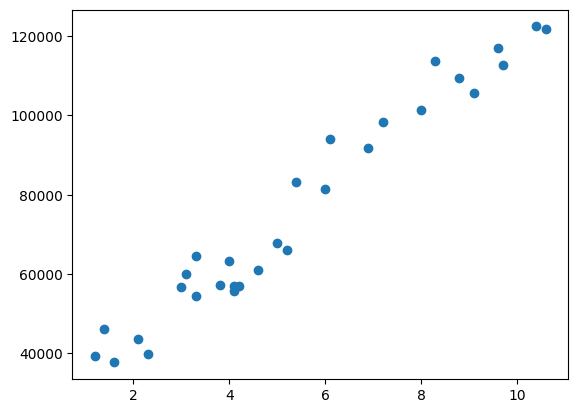

In [4]:
# visualize the relationship between the features and the response using scatterplots
plt.scatter(data['Experience'], data['Salary'])

In [5]:
# create X and y
X = data[['Experience']]    #DataFrame
y = data.Salary      #Series (data['Sales']) / NP Array
print(X)
print(y)

    Experience
0          1.2
1          1.4
2          1.6
3          2.1
4          2.3
5          3.0
6          3.1
7          3.3
8          3.3
9          3.8
10         4.0
11         4.1
12         4.1
13         4.2
14         4.6
15         5.0
16         5.2
17         5.4
18         6.0
19         6.1
20         6.9
21         7.2
22         8.0
23         8.3
24         8.8
25         9.1
26         9.6
27         9.7
28        10.4
29        10.6
0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [7]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)    # lm.fit(DataFrame, Series/Array)

# print intercept and coefficients
print("Intercept-",lm.intercept_)
print("Coeffcient-",lm.coef_)

Intercept- 24848.203966523208
Coeffcient- [9449.96232146]


In [9]:
# you have to create a DataFrame since the predict method expects it
X_new = pd.DataFrame({'Experience': [2.3]})
print("Predicted salary-",lm.predict(X_new))

Predicted salary- [46583.11730587]


In [10]:
# create a DataFrame with the minimum and maximum values of Experience
X_new = pd.DataFrame({'Experience': [data['Experience'].min(), data['Experience'].max()]})
X_new.head()

,Experience
0,1.2
1,10.6


In [12]:
# make predictions for those x values and store them
preds = lm.predict(X_new)   # Need a DataFrame
print("predicitions-",preds)

predicitions- [ 36188.15875227 125017.80457395]


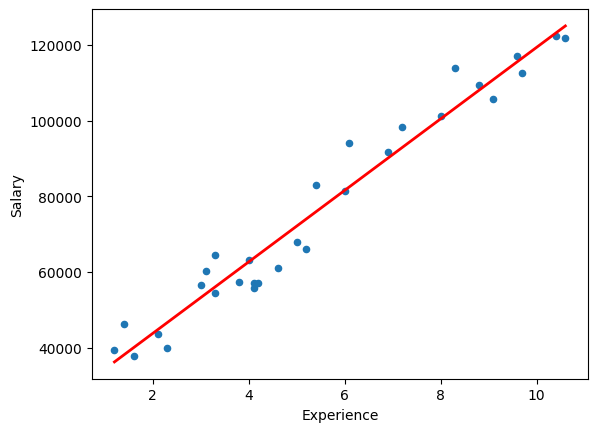

In [13]:
# first, plot the observed data
data.plot(kind='scatter', x='Experience', y='Salary')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
predictions = lm.predict(X)

# RMSE form training data
print("RMSE-",sqrt(mean_squared_error(y, predictions)))

# R2 Score
print("R-squared value-",r2_score(y, predictions))

RMSE- 5592.043608760661
R-squared value- 0.9569566641435086
